In [37]:
# importing dependencies
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt



In [13]:
# importing dependencies
import numpy as np
import pandas as pd


In [6]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [8]:
# importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [15]:
#using pandas to read the database stored in the same folder
data = pd.read_csv('abcd.csv')

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [32]:
# extracting data from the dataset and viewing up them close
a=data.iloc[3,1:].values

In [63]:
# reshaping the extracted data into a reasonable size
a=a.reshape(1,11).astype('uint8')
plt.imshow(a)

ValueError: invalid literal for int() with base 10: 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [48]:
data.groupby(['Survived','Pclass','Sex','Embarked']).Fare.median()

Survived  Pclass  Sex     Embarked
0         1       female  C            28.71250
                          S           151.55000
                  male    C            61.37920
                          Q            90.00000
                          S            35.50000
          2       female  S            17.00000
                  male    C            25.86040
                          Q            12.35000
                          S            13.00000
          3       female  C            14.45625
                          Q             7.75000
                          S            18.00000
                  male    C             7.22920
                          Q             7.75000
                          S             8.05000
1         1       female  C            83.15830
                          Q            90.00000
                          S            79.65000
                  male    C            63.35830
                          S            30.50000
     

In [49]:
data.Embarked.fillna("S",inplace=True)

In [47]:
data.loc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


214/891

In [51]:
214/891

0.24017957351290684

In [54]:
data.Cabin.fillna("Unknown",inplace=True)

In [55]:
data.Age.fillna(28,inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
data.groupby(['Survived','Sex']).Age.median()

Survived  Sex   
0         female    28.0
          male      28.0
1         female    28.0
          male      28.0
Name: Age, dtype: float64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


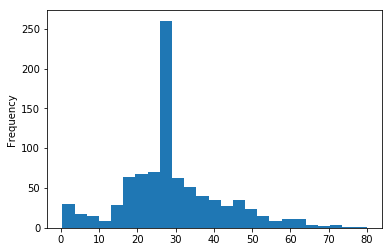

In [62]:
data.Age.plot(kind="hist",bins=25)

In [64]:
# preparing the data
# seperating labels and data values
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [107]:
# creating test and train sizes

x_train, x_test, y_train, y_test=train_test_split(df_x, df_y, test_size = 0.2, random_state=4)

In [108]:
x_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,Unknown,C
684,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,Unknown,S
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,Unknown,S
409,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,4133,25.4667,Unknown,S
740,1,1,"Hawksford, Mr. Walter James",male,28.0,0,0,16988,30.0000,D45,S


In [78]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [80]:
data.loc[:,'Sex']=lb.fit_transform(data.loc[:,'Sex'])

In [81]:
data.loc[:,'Cabin']=lb.fit_transform(data.loc[:,'Cabin'])

In [82]:
data.loc[:,'Embarked']=lb.fit_transform(data.loc[:,'Embarked'])

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [89]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
y=data.loc[6:7,'Survived']
x=data.loc[:,['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare', 'Cabin', 'Embarked']]

In [95]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,147,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,129,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,147,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,147,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,147,0


In [96]:
y


6    0
7    0
Name: Survived, dtype: int64

In [97]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,147,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,147,2
3,1,0,35.0,1,0,53.1000,55,2
4,3,1,35.0,0,0,8.0500,147,2
5,3,1,28.0,0,0,8.4583,147,1
6,1,1,54.0,0,0,51.8625,129,2
7,3,1,2.0,3,1,21.0750,147,2
8,3,0,27.0,0,2,11.1333,147,2
9,2,0,14.0,1,0,30.0708,147,0


In [99]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test,y_train, y_test=train_test_split(df_x, df_y, test_size = 0.2, random_state=4)

In [111]:
y_test

646    647
876    877
359    360
194    195
819    820
      ... 
568    569
254    255
406    407
710    711
864    865
Name: PassengerId, Length: 179, dtype: int64

In [112]:
x_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
646,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,Unknown,S
876,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,Unknown,S
359,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.0,0,0,330980,7.8792,Unknown,Q
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
819,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,Unknown,S
55,1,1,"Woolner, Mr. Hugh",male,28.0,0,0,19947,35.5000,C52,S
720,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,Unknown,S
612,1,3,"Murphy, Miss. Margaret Jane",female,28.0,1,0,367230,15.5000,Unknown,Q
155,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,Unknown,C
714,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,Unknown,S


In [113]:
x_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,0,3,"Kraeff, Mr. Theodor",male,28.00,0,0,349253,7.8958,Unknown,C
684,0,2,"Brown, Mr. Thomas William Solomon",male,60.00,1,1,29750,39.0000,Unknown,S
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.00,1,0,349910,15.5500,Unknown,S
409,0,3,"Lefebre, Miss. Ida",female,28.00,3,1,4133,25.4667,Unknown,S
740,1,1,"Hawksford, Mr. Walter James",male,28.00,0,0,16988,30.0000,D45,S
763,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S
374,0,3,"Palsson, Miss. Stina Viola",female,3.00,3,1,349909,21.0750,Unknown,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S
452,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C
120,0,2,"Hickman, Mr. Stanley George",male,21.00,2,0,S.O.C. 14879,73.5000,Unknown,S


In [114]:
y_train.head()

42      43
684    685
605    606
409    410
740    741
Name: PassengerId, dtype: int64

In [115]:
x_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,Unknown,C
684,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,Unknown,S
605,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,Unknown,S
409,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,4133,25.4667,Unknown,S
740,1,1,"Hawksford, Mr. Walter James",male,28.0,0,0,16988,30.0000,D45,S
